<a href="https://colab.research.google.com/github/amolamahadik/Dissertation/blob/main/TB_classification_with_augumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# a = []
# while(1):
#     a.append('1')

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from tensorflow.keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import random
import glob
import shutil
import matplotlib.pyplot as plt
import itertools
import pandas as pd


from time import time
from skimage import io



In [3]:

os.chdir('/content/drive/MyDrive/TB Data.zip (Unzipped Files)/TB Data')
# datagen = ImageDataGenerator(        
#             rotation_range=10,
#             width_shift_range=0.092,  
#             height_shift_range=0.092,    
#             shear_range=0.09,        
#             zoom_range=0.095,        
#             horizontal_flip=True,         
#             fill_mode='constant',cval=125)



In [ ]:
# image_directory='E:/MS UK/MA981/TB Dataset/TB_Chest_Radiography_Database/Tuberculosis/'
# SIZE=512


In [ ]:
# dataset = []
# my_images = os.listdir(image_directory)
# for i, image_name in enumerate(my_images):    
#    if (image_name.split('.')[1] == 'png'):        
#        image = plt.imread(image_directory + image_name)        
#        image = Image.fromarray(image, 'RGB')        
#        image = image.resize((SIZE,SIZE)) 
#        dataset.append(np.array(image))

In [ ]:
# x = np.array(dataset)
# x.shape
# i = 0
# for batch in datagen.flow(x, batch_size=4,
#                            save_to_dir='E:/MS UK/MA981/TB Dataset/TB_Chest_Radiography_Database/Tuberculosis',
#                            save_prefix='TB_aug',
#                            save_format='png'):
#      i+=1
#      if i > 700: #Epochs
#          break


In [ ]:
# os.chdir('E:/MS UK/MA981/TB Dataset')
# input_folder='TB_Chest_Radiography_Database/'

In [ ]:
# splitfolders.ratio(input_folder,output="TB Data",
#                   seed=40,ratio=(.7, .2, .1),
#                   group_prefix=None)



#Seperating train, test and validation dataset

# if os.path.isdir('train/Normal') is False:
#     os.makedirs('train/Normal')
#     os.makedirs('train/TB')
    
    
#     os.makedirs('test/Normal')
#     os.makedirs('test/TB')
    
   
#     os.makedirs('valid/Normal')
#     os.makedirs('valid/TB')
    
    
#     for c in random.sample(glob.glob('N*.png'),2450):
#         shutil.move(c, 'train/Normal' )
#     for c in random.sample(glob.glob('T*.png'),2450):
#         shutil.move(c, 'train/TB' )
   
#     for c in random.sample(glob.glob('N*.png'),700):
#         shutil.move(c, 'valid/Normal' )
#     for c in random.sample(glob.glob('T*.png'),700):
#         shutil.move(c, 'valid/TB' )
   
    
#     for c in random.sample(glob.glob('N*.png'),350):
#         shutil.move(c, 'test/Normal' )
#     for c in random.sample(glob.glob('T*.png'),350):
#         shutil.move(c, 'test/TB' )
    


In [4]:
train_path=('/content/drive/MyDrive/TB Data.zip (Unzipped Files)/TB Data/train')
valid_path=('/content/drive/MyDrive/TB Data.zip (Unzipped Files)/TB Data/valid')
test_path=('/content/drive/MyDrive/TB Data.zip (Unzipped Files)/TB Data/test')

In [5]:
train_batches=ImageDataGenerator(rescale=1./255) \
                .flow_from_directory(directory=train_path,target_size=(512,512) ,classes=['Normal','TB'],
                                    batch_size=32,class_mode='binary')
valid_batches=ImageDataGenerator(rescale=1./255) \
                .flow_from_directory(directory=valid_path,target_size=(512,512) ,classes=['Normal','TB'],
                                    batch_size=32,class_mode='binary')
test_batches=ImageDataGenerator(rescale=1./255) \
                .flow_from_directory(directory=test_path,target_size=(512,512) ,classes=['Normal','TB'],
                                    batch_size=32,class_mode='binary',shuffle=False)



Found 4900 images belonging to 2 classes.
Found 1400 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


In [6]:
assert train_batches.n==4900
assert valid_batches.n==1400
assert test_batches.n==700

assert train_batches.num_classes==test_batches.num_classes==valid_batches.num_classes==2

print(train_batches.class_indices)
print(valid_batches.class_indices)
print(test_batches.class_indices)

{'Normal': 0, 'TB': 1}
{'Normal': 0, 'TB': 1}
{'Normal': 0, 'TB': 1}


In [7]:
def plot_training(applied_model):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(applied_model.history['accuracy'])
    plt.plot(applied_model.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(applied_model.history['loss'])
    plt.plot(applied_model.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

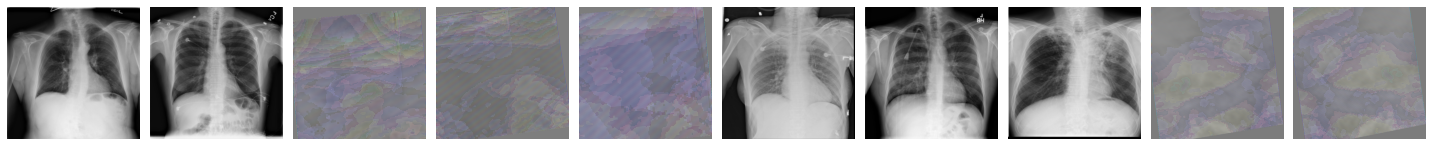

(10, 512, 512, 3)

[0. 0. 1. 1. 1. 0. 0. 1. 1. 1.]


In [8]:
imgs, labels=next(train_batches)
def plotImages(images_arr):
     fig,axes=plt.subplots(1,10,figsize=(20,20))
     axes=axes.flatten()
     for img,ax in zip(images_arr,axes):
         ax.imshow(img)
         ax.axis('off')
     plt.tight_layout()
     plt.show()
plotImages(imgs)
print(labels)
imgs.shape

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

models_dir = "saved_models"
# if not os.path.exists(models_dir):
#     os.makedirs(models_dir)
checkpointer = ModelCheckpoint( filepath='saved_models/model_cnn.hdf5',monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:

model=Sequential([Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',input_shape=(512,512,3)),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),
                 
                  Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),

                  Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),

                  Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),

                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),

                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),
                  
                  Flatten(), 
                  Dense(units=1,activation='sigmoid'),
                 ])
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 256, 256, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 128, 128, 128)     0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_cnn=model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=1,callbacks=callbacks)

Epoch 1/10
490/490 [==============================] - ETA: 0s - loss: 0.3736 - accuracy: 0.8190
Epoch 1: val_accuracy improved from -inf to 0.93214, saving model to saved_models/model_cnn.hdf5
490/490 [==============================] - 920s 2s/step - loss: 0.3736 - accuracy: 0.8190 - val_loss: 0.4273 - val_accuracy: 0.9321 - lr: 1.0000e-04
Epoch 2/10
490/490 [==============================] - ETA: 0s - loss: 0.1532 - accuracy: 0.9408
Epoch 2: val_accuracy improved from 0.93214 to 0.94857, saving model to saved_models/model_cnn.hdf5
490/490 [==============================] - 166s 338ms/step - loss: 0.1532 - accuracy: 0.9408 - val_loss: 0.3765 - val_accuracy: 0.9486 - lr: 1.0000e-04
Epoch 3/10
490/490 [==============================] - ETA: 0s - loss: 0.1326 - accuracy: 0.9463
Epoch 3: val_accuracy improved from 0.94857 to 0.94929, saving model to saved_models/model_cnn.hdf5
490/490 [==============================] - 165s 337ms/step - loss: 0.1326 - accuracy: 0.9463 - val_loss: 0.3596 - 

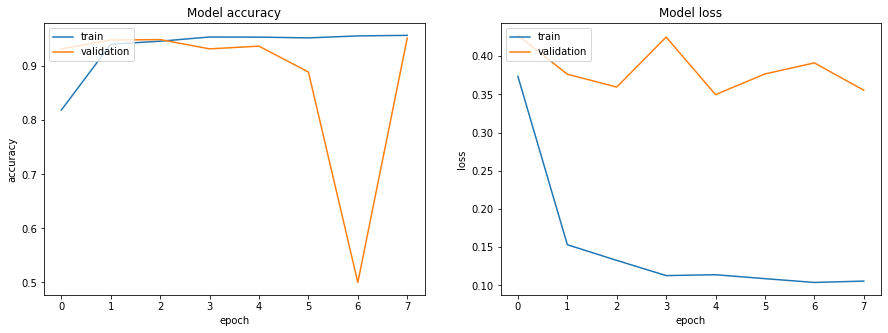

In [ ]:
plot_training(model_cnn)

In [ ]:
test_img,test_labels=next(test_batches)
#plotImages(test_img)
#print(test_labels)
#test_batches.classes
model.load_weights('saved_models/model_cnn.hdf5')
score_cnn = model.evaluate(test_batches, verbose=1)
score_cnn

700/700 [==============================] - 156s 222ms/step - loss: 0.3555 - accuracy: 0.9614


[0.3555036187171936, 0.9614285826683044]

In [ ]:

def vgg(input_shape, n_classes):
  input = Input(input_shape)
  x = Conv2D(64, 3, padding='same', activation='relu')(input)
  x = Conv2D(64, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  x = Conv2D(28, 3, padding='same', activation='relu')(x)
  x = Conv2D(128, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)

  output = Dense(1, activation='sigmoid')(x)
  model = Model(input, output)
  return model




In [ ]:
K.clear_session()
input_shape=(512,512,3)
n_classes=2
model=vgg(input_shape,n_classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 512, 512, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 28)      16156     
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 128)     32384     
                                                             

In [ ]:
checkpointer = ModelCheckpoint( filepath='saved_models/VGG_model.hdf5',monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Training of CNN VGG 16 model with 10 epochs
VGG_model=model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=1,callbacks=callbacks)

Epoch 1/10
490/490 [==============================] - ETA: 0s - loss: 0.3551 - accuracy: 0.8600
Epoch 1: val_accuracy improved from -inf to 0.94571, saving model to saved_models/VGG_model.hdf5
490/490 [==============================] - 495s 972ms/step - loss: 0.3551 - accuracy: 0.8600 - val_loss: 0.1379 - val_accuracy: 0.9457 - lr: 1.0000e-04
Epoch 2/10
490/490 [==============================] - ETA: 0s - loss: 0.1218 - accuracy: 0.9582
Epoch 2: val_accuracy improved from 0.94571 to 0.98500, saving model to saved_models/VGG_model.hdf5
490/490 [==============================] - 1106s 2s/step - loss: 0.1218 - accuracy: 0.9582 - val_loss: 0.0539 - val_accuracy: 0.9850 - lr: 1.0000e-04
Epoch 3/10
490/490 [==============================] - ETA: 0s - loss: 0.1331 - accuracy: 0.9584
Epoch 3: val_accuracy did not improve from 0.98500
490/490 [==============================] - 926s 2s/step - loss: 0.1331 - accuracy: 0.9584 - val_loss: 0.0646 - val_accuracy: 0.9771 - lr: 1.0000e-04
Epoch 4/10
49

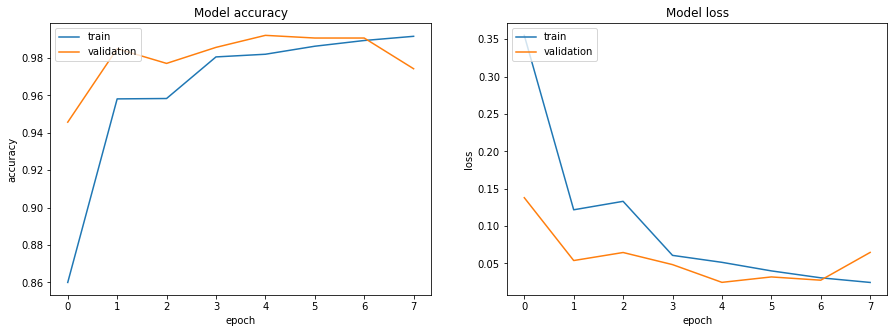

In [ ]:
plot_training(VGG_model)

In [ ]:
test_img,test_labels=next(test_batches)
#plotImages(test_img)
#print(test_labels)
#test_batches.classes
model.load_weights('saved_models/VGG_model.hdf5')
score_vgg = model.evaluate(test_batches, verbose=1)
score_vgg

700/700 [==============================] - 126s 178ms/step - loss: 0.0182 - accuracy: 0.9943


[0.01818409562110901, 0.9942857027053833]

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(512,512,3)))

model.add(Dense(128,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(128,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(256,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(256,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(256,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 786432)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               100663424 
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 1)                 2

In [ ]:
checkpointer = ModelCheckpoint( filepath='saved_models/ann_model.hdf5',monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann_model=model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=1,callbacks=callbacks)

Epoch 1/10
490/490 [==============================] - ETA: 0s - loss: 0.3506 - accuracy: 0.9043
Epoch 1: val_accuracy improved from -inf to 0.96357, saving model to saved_models/ann_model.hdf5
490/490 [==============================] - 108s 219ms/step - loss: 0.3506 - accuracy: 0.9043 - val_loss: 0.0944 - val_accuracy: 0.9636 - lr: 1.0000e-04
Epoch 2/10
490/490 [==============================] - ETA: 0s - loss: 0.1246 - accuracy: 0.9573
Epoch 2: val_accuracy did not improve from 0.96357
490/490 [==============================] - 95s 192ms/step - loss: 0.1246 - accuracy: 0.9573 - val_loss: 0.0982 - val_accuracy: 0.9636 - lr: 1.0000e-04
Epoch 3/10
490/490 [==============================] - ETA: 0s - loss: 0.1154 - accuracy: 0.9596
Epoch 3: val_accuracy improved from 0.96357 to 0.96786, saving model to saved_models/ann_model.hdf5
490/490 [==============================] - 102s 208ms/step - loss: 0.1154 - accuracy: 0.9596 - val_loss: 0.0844 - val_accuracy: 0.9679 - lr: 1.0000e-04
Epoch 4/1

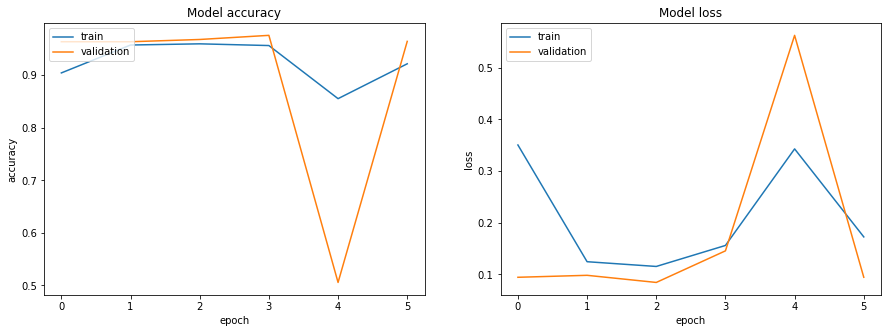

In [ ]:
plot_training(ann_model)

In [ ]:
test_img,test_labels=next(test_batches)
#plotImages(test_img)
#print(test_labels)
model.load_weights('saved_models/ann_model.hdf5')
score_ann = model.evaluate(test_batches, verbose=1)
score_ann

700/700 [==============================] - 12s 17ms/step - loss: 0.1412 - accuracy: 0.9686


[0.14117439091205597, 0.9685714244842529]

In [ ]:
def alexnet(input_shape, n_classes):
  input = Input(input_shape)
  
  # actually batch normalization didn't exist back then
  # they used LRN (Local Response Normalization) for regularization
  x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Conv2D(256, 5, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
  x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)
  
  output = Dense(1, activation='sigmoid')(x)
  
  model = Model(input, output)
  return model

In [ ]:
K.clear_session()
input_shape=(512,512,3)
n_classes=2
model=alexnet(input_shape,n_classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 96)      34944     
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 96)     384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 63, 63, 256)      1024  

In [ ]:
checkpointer = ModelCheckpoint( filepath='saved_models/alex_model.hdf5',monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
alex_model=model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=1,callbacks=callbacks)

Epoch 1/10
490/490 [==============================] - ETA: 0s - loss: 0.6673 - accuracy: 0.9469
Epoch 1: val_accuracy improved from -inf to 0.91000, saving model to saved_models/alex_model.hdf5
490/490 [==============================] - 122s 244ms/step - loss: 0.6673 - accuracy: 0.9469 - val_loss: 0.2734 - val_accuracy: 0.9100 - lr: 1.0000e-04
Epoch 2/10
490/490 [==============================] - ETA: 0s - loss: 0.2889 - accuracy: 0.9684
Epoch 2: val_accuracy did not improve from 0.91000
490/490 [==============================] - 122s 249ms/step - loss: 0.2889 - accuracy: 0.9684 - val_loss: 907.0816 - val_accuracy: 0.5007 - lr: 1.0000e-04
Epoch 3/10
490/490 [==============================] - ETA: 0s - loss: 0.2284 - accuracy: 0.9657
Epoch 3: val_accuracy improved from 0.91000 to 0.97571, saving model to saved_models/alex_model.hdf5
490/490 [==============================] - 133s 271ms/step - loss: 0.2284 - accuracy: 0.9657 - val_loss: 0.0601 - val_accuracy: 0.9757 - lr: 1.0000e-04
Epoc

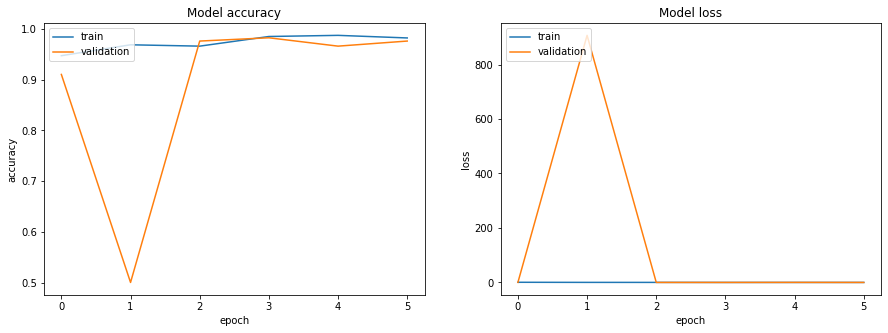

In [ ]:
plot_training(alex_model)

In [ ]:
test_img,test_labels=next(test_batches)
#plotImages(test_img)
#print(test_labels)
model.load_weights('saved_models/alex_model.hdf5')
score_alex = model.evaluate(test_batches, verbose=1)
score_alex

700/700 [==============================] - 60s 85ms/step - loss: 0.0746 - accuracy: 0.9829


[0.07461173087358475, 0.9828571677207947]

In [8]:
model=tf.keras.models.load_model('/content/drive/MyDrive/TB Data.zip (Unzipped Files)/TB Data/saved_models/model_cnn.hdf5', compile=True)

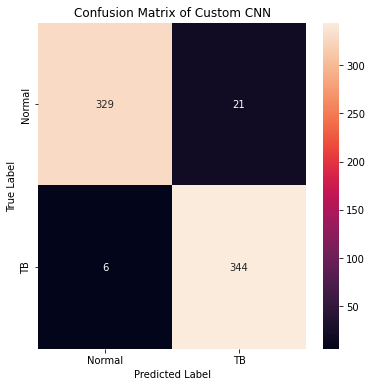

In [17]:
y_pred=model.predict(test_batches)
y_pred
y_pred=(y_pred>0.5)
cm=confusion_matrix(test_batches.classes,y_pred)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_batches.class_indices)
Patient_labels = ['Normal', 'TB']
ax.yaxis.set_ticklabels(Patient_labels)
plt.title("Confusion Matrix of Custom CNN")
plt.show()

In [18]:
report_cnn = classification_report(test_batches.classes, y_pred, target_names=Patient_labels, output_dict=True)
df1 = pd.DataFrame(report_cnn).transpose()
df1

,precision,recall,f1-score,support
Normal,0.982090,0.940000,0.960584,350.000000
TB,0.942466,0.982857,0.962238,350.000000
accuracy,0.961429,0.961429,0.961429,0.961429
macro avg,0.962278,0.961429,0.961411,700.000000
weighted avg,0.962278,0.961429,0.961411,700.000000


In [7]:
model=tf.keras.models.load_model('/content/drive/MyDrive/TB Data.zip (Unzipped Files)/TB Data/saved_models/alex_model.hdf5', compile=True)

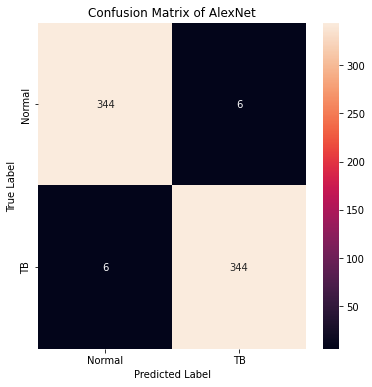

In [8]:
y_pred=model.predict(test_batches)
y_pred
y_pred=(y_pred>0.5)
cm=confusion_matrix(test_batches.classes,y_pred)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_batches.class_indices)
Patient_labels = ['Normal', 'TB']
ax.yaxis.set_ticklabels(Patient_labels)
plt.title("Confusion Matrix of AlexNet")
plt.show()

In [9]:
report_alex = classification_report(test_batches.classes, y_pred, target_names=Patient_labels, output_dict=True)
df_alex = pd.DataFrame(report_alex).transpose()
df_alex

,precision,recall,f1-score,support
Normal,0.982857,0.982857,0.982857,350.000000
TB,0.982857,0.982857,0.982857,350.000000
accuracy,0.982857,0.982857,0.982857,0.982857
macro avg,0.982857,0.982857,0.982857,700.000000
weighted avg,0.982857,0.982857,0.982857,700.000000


In [10]:
model=tf.keras.models.load_model('/content/drive/MyDrive/TB Data.zip (Unzipped Files)/TB Data/saved_models/ann_model.hdf5', compile=True)

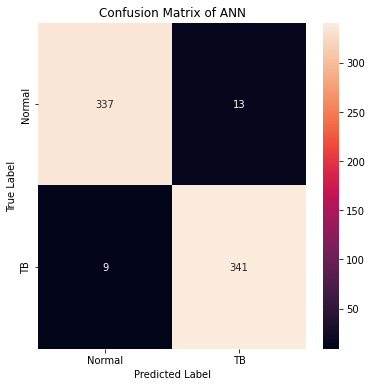

In [11]:
y_pred=model.predict(test_batches)
y_pred
y_pred=(y_pred>0.5)
cm=confusion_matrix(test_batches.classes,y_pred)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_batches.class_indices)
Patient_labels = ['Normal', 'TB']
ax.yaxis.set_ticklabels(Patient_labels)
plt.title("Confusion Matrix of ANN")
plt.show()

In [12]:
report_ann = classification_report(test_batches.classes, y_pred, target_names=Patient_labels, output_dict=True)
df_ann = pd.DataFrame(report_ann).transpose()
df_ann

,precision,recall,f1-score,support
Normal,0.973988,0.962857,0.968391,350.000000
TB,0.963277,0.974286,0.968750,350.000000
accuracy,0.968571,0.968571,0.968571,0.968571
macro avg,0.968633,0.968571,0.968570,700.000000
weighted avg,0.968633,0.968571,0.968570,700.000000
